In [1]:
%matplotlib inline

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
def logToMsgs(name):
    file = open(name)
    comments = 0
    while True:
        line = file.readline()
        if not line:
            break
        elif not line.startswith('#'):
            arr = line.strip().split(',')
            yield [(int(x) % 256) for x in arr[:-1]]

In [177]:
msgs = list(logToMsgs('../resources/logs/4.5-new.log'))
#msgs = list(logToMsgs('../resources/logs/4.1.log'))

ids = np.array([msg[0] for msg in msgs])



(0, 100)

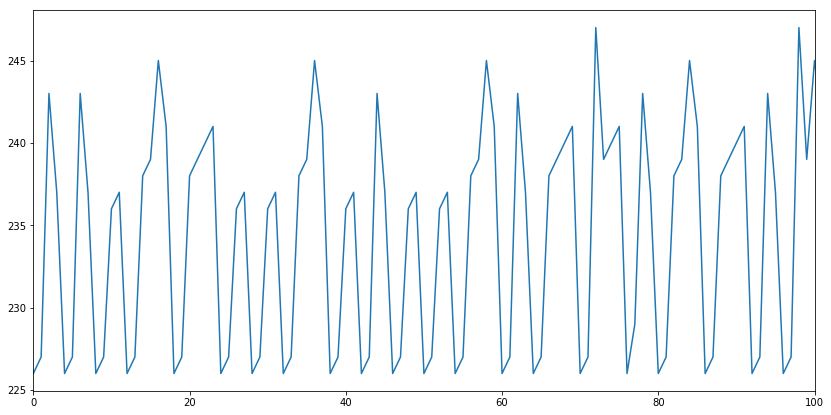

In [178]:
plt.figure(2, figsize=(14,7))
plt.plot(ids)
plt.xlim(0,100)

In [179]:
N = ids.size

cors = np.zeros(2*N-1)

for i in range(0,2*N-1):
    n = i-N+1
    if (n < 0):
        sig1 = ids[-n:]
        sig2 = ids[:n]
    elif (n == 0):
        sig1 = ids
        sig2 = ids
    else:
        sig1 = ids[:-n]
        sig2 = ids[n:]
    # Remove mean
    sig1 = sig1-np.mean(sig1)
    sig2 = sig2-np.mean(sig2)
    corr = np.sum(sig1*sig2)
    # Normalize
    std = np.sqrt(np.sum(sig1*sig1)*np.sum(sig2*sig2))
    if (std > 0):
        corr = corr/std
    cors[i] = corr



(0, 200)

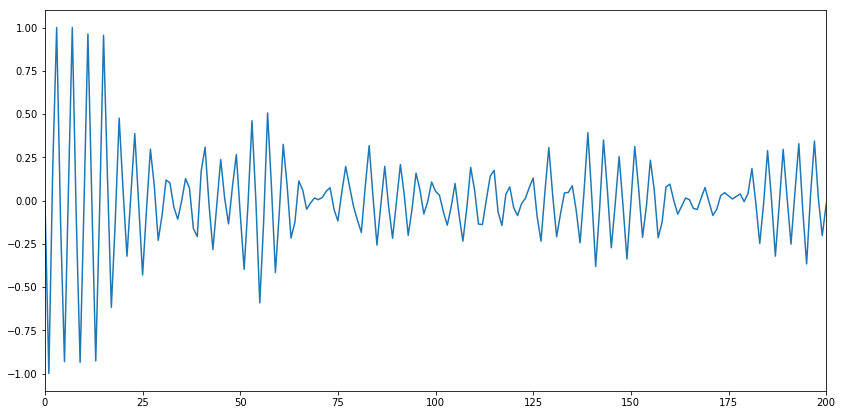

In [180]:
plt.figure(5, figsize=(14,7))
plt.plot(cors)
plt.xlim(0,200)

(array([   8.,    0.,   18.,    0.,  152.,    0.,   20.,    0.,   18.,    2.]),
 array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ]),
 <a list of 10 Patch objects>)

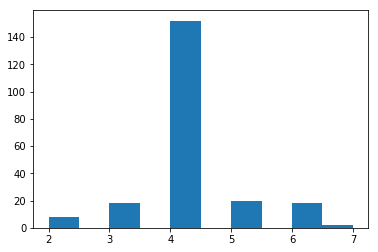

In [181]:
peaks = np.zeros_like(cors)

for n in range(1,peaks.size-1):
    if cors[n-1] < cors[n] and cors[n] > cors[n+1]:
        peaks[n] = 1

DT = np.diff(np.where(peaks == 1)[0])
        
plt.figure(9)
plt.hist(DT)

(array([ 0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
          8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
         17.5,  18.5]),
 <a list of 19 Patch objects>)

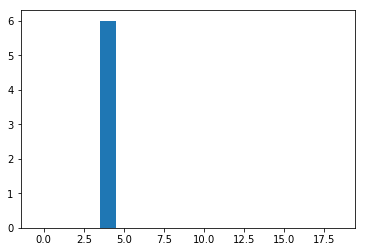

In [182]:
tops = np.where(cors > 0.95)[0]
dt = np.diff(tops);

plt.figure(8)
plt.hist(dt, bins=np.arange(0,20)-.5)

#ids.size/3

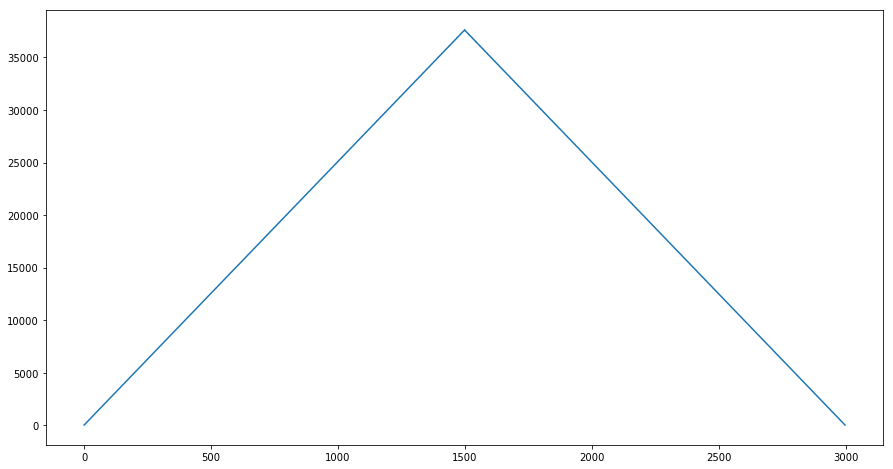

In [79]:
idsn = (ids-np.min(ids))/(np.max(ids)-np.min(ids))



corr = np.correlate(ids, ids, mode='full')

plt.figure(1, figsize=(15,8))
plt.plot(corr/idsn.size)
#plt.ylim((0,1))
#plt.xlim(0,30)


In [63]:
ids.shape

(1500,)

(-0.06666666666666667, 0.06666666666666667)

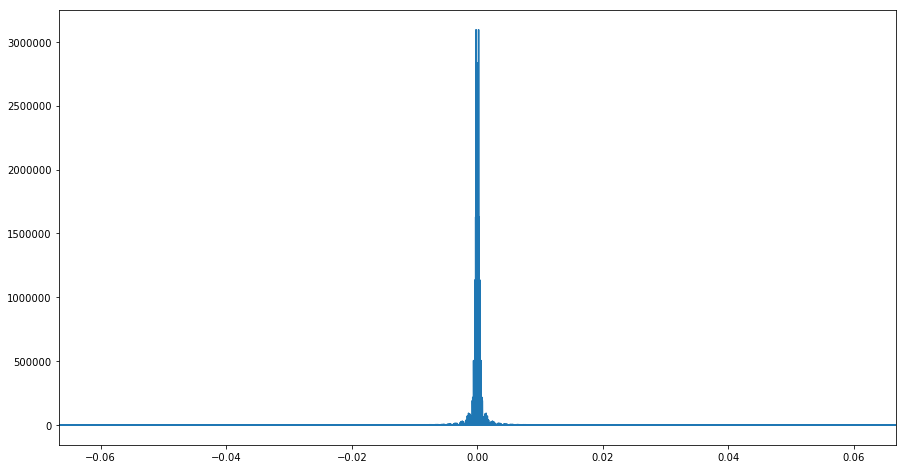

In [72]:
ids2 = np.interp(np.arange(0,1500*1000)/1000, np.arange(0,1500), ids)

IDS = np.fft.fft(ids2-np.mean(ids2))

plt.figure(3, figsize=(15,8))
plt.plot(np.fft.fftfreq(ids2.size),np.abs(IDS))
plt.xlim((-1/15,1/15))

In [32]:
print(corr)

[9828500]
